# Part II - Prosper's Loan Data Insights
## By AKALASU, Chidinma Stephanie


## Investigation Overview

> This investigation made use of the Prosper loan dataset. This loan dataset has 113,937 loan observations and 81 columns/fields with names like interest rate, lender yield, borrower income, loan close date, borrower occupation, anticipated loss, loan tenure, investors, and many more. This dataset is available here, and you can get its data dictionaries here.


## Dataset Overview

> The dataset used for this investigation has 83,520 observations and 9 features are LenderYield, Loan Original Amount, Borrower Rate, Occupation, Stated Monthly Income, Term, ProsperRating, Employment Status, and Is Borrower Homeowner. And these were used to conduct rigorous analysis on Prosper's loan data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
chi=pd.read_csv('prosperLoanData.csv')
fields = ['LenderYield','LoanOriginalAmount', 'BorrowerRate','Occupation','StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
       'EmploymentStatus', 'IsBorrowerHomeowner']

#Subset the dataframe to be used for the analysis
chi=chi[fields]

In [3]:
#Rename the Dataset columns for easy identifications
chi.rename(columns={'LenderYield': 'LY','LoanOriginalAmount': 'LOA', 'BorrowerRate':'BR','Occupation':'OC',
                      'StatedMonthlyIncome':'SMI', 'Term':'TM', 'ProsperRating (Alpha)':'PRA', 
                      'EmploymentStatus':'ES', 'IsBorrowerHomeowner':'IBH'}, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Lender's Yield Histogram

> _From the figure below, the distribution of the Lender's Yield looks like multimodal distribution. As can be seen from the figure, the Proper's loan have a lot of its Lender's Yield mostly centered between 0.1 and 0.28, though circa of 0.3 (30%) is most occuring lender yield._

Text(0.5,1,"Histogram of Lender's Yield")

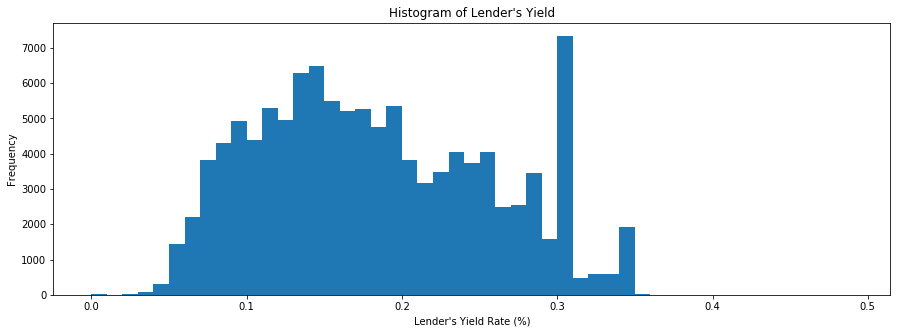

In [4]:
#Visualise the variable of interest using histogram plot
bins = np.arange(0, chi['LY'].max()+0.001, 0.01)
plt.figure(figsize=[15, 5])
plt.hist(data = chi, x = 'LY', bins = bins);
plt.xlabel("Lender's Yield Rate (%)")
plt.ylabel('Frequency')
plt.title("Histogram of Lender's Yield")

## Relationship Lender's Yield and Predicting Features

> _From the correlation heatmap of the numeric variable in dataset below, it can be seen the different relationship or association between various of numeric variables including our variable of interest (Lender's Yield). As evident from the hitmap visual, Lender's Yield has perfect positive relation with Borrower's Rate..._

Text(0.5,1,"Relationship Lender's Yield and Predicting Features")

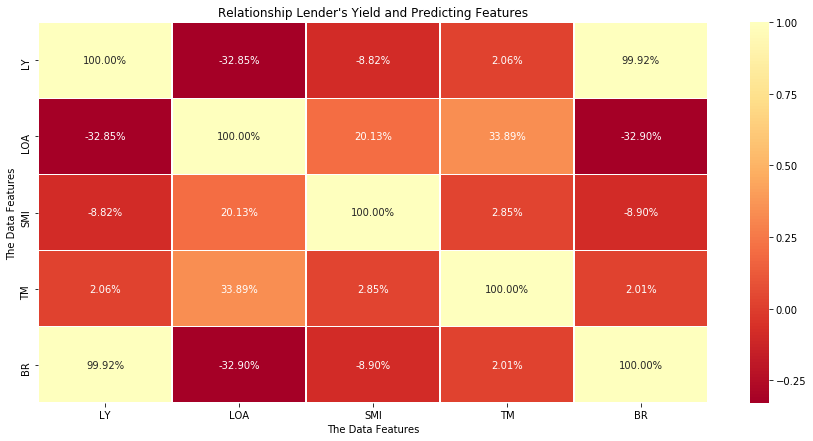

In [5]:
#Show the heatman-correlation plot among all the numeric variables and the variable of interest(borrower's cost)
plt.figure(figsize = [15, 7])
sns.heatmap(chi[['LY','LOA','SMI','TM',
                    'BR']].corr(), linewidths=0.30, annot = True, fmt = '.2%',
           cmap = 'RdYlGn', center = 1);
plt.xlabel('The Data Features')
plt.ylabel('The Data Features')
plt.title("Relationship Lender's Yield and Predicting Features")

## The Between the Lender Yield and Loan Original Amount Regression Plot

> _From the figure below, the Lender Yield has negatively but weak relationship with original loam amount. And this suggests that the higher the income, the lower the Lender Yield. In fact, some income level suggest that the Lender Yield would likely to be negative. Nonetheless, majority the stated monthly income falls below 250,000 and the Lender Yield between 0 and 0.5._

Text(0,0.5,'Lender Yield Rate (%)')

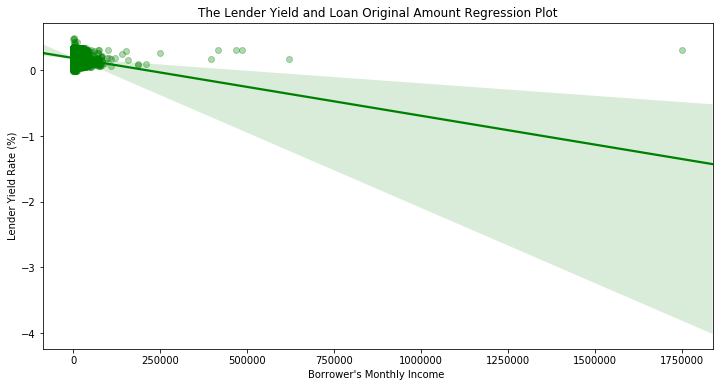

In [6]:
#Display the regression plot between the Lender Yield and Loan Original Amount
plt.figure(figsize = [12, 6])
sns.regplot(data = chi, x = 'SMI', 
           y = 'LY', scatter_kws={'alpha':0.3}, color='green')
plt.title('The Lender Yield and Loan Original Amount Regression Plot')
plt.xlabel("Borrower's Monthly Income ")
plt.ylabel("Lender Yield Rate (%)")

## Relationship Between Borrower's Yield(%) and Borrower's Monthly Income as Per Prosper's Rating

> _The visual grid exhibit the relationship between borrowing cost (our variable of interest) and loan amount as per the rating. The C rating show that borrowing cost might not change for any amount of loan sought and the same thing for A, D, and B ratings. Only E, AA and HR that have a slight possible change in borrowing cost with respect to loan amount request._

Text(0.5,0.98,"Relationship Between Lender's Yield (%) and Borrower's Monthly Income as Per Loan Terms")

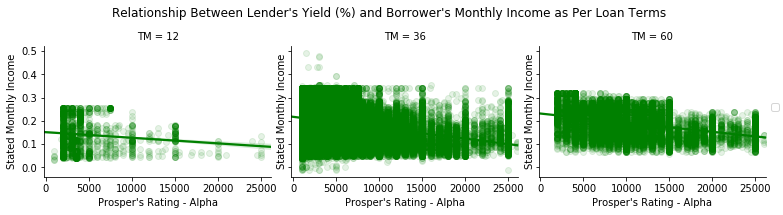

In [7]:
#Examine the effect of term (loan's lengths in month) on borrower's cost (%) and amount of loan requested
ch1=sns.FacetGrid(data=chi, aspect=1.2, col='TM', col_wrap=3)
ch1.map(sns.regplot, 'LOA', 'LY', x_jitter=0.04, scatter_kws={'alpha':0.1}, color="green")
ch1.add_legend()
ch1.set(xlabel="Prosper's Rating - Alpha", ylabel="Stated Monthly Income")
ch1.fig.subplots_adjust(top=.8)
ch1.fig.suptitle("Relationship Between Lender's Yield (%) and Borrower's Monthly Income as Per Loan Terms")

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [8]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
